In [158]:
# importing modules and reading the data set
import pandas as pd, numpy as np, csv 
import math
import matplotlib.pyplot as plt
ds = pd.read_csv('kc_house_data.csv')

In [159]:
# Normalizing the data set
ds = (ds - ds.mean())/ds.max()

In [160]:
# Dividing data set into training and testing data sets
training_ds = ds[0:int(0.8*len(ds))].as_matrix()
#training_ds = np.insert(training_ds,0,1,axis=1)
test_ds = ds[int(0.8*len(ds)):len(ds)].as_matrix()
#test_ds = np.insert(test_ds,0,1,axis=1)

In [161]:
# Diving into features and output
train1_x = training_ds[:,:-1] # Linear
train2_x = np.hstack((np.power(train1_x,2),np.power(train1_x,3))) # Quadratic
train3_x = np.hstack((train2_x,np.power(train1_x,3))) # Cubic
train1_x = np.insert(train1_x,0,1,axis=1)
train2_x = np.insert(train2_x,0,1,axis=1)
train3_x = np.insert(train3_x,0,1,axis=1)
train_y = training_ds[:,-1]
test1_x = test_ds[:,:-1] #Linear
test2_x = np.hstack((test1_x,np.power(test1_x,2))) #Quadratic
test3_x = np.hstack((test2_x,np.power(test1_x,3))) # Cubic
test1_x = np.insert(test1_x,0,1,axis=1)
test2_x = np.insert(test2_x,0,1,axis=1)
test3_x = np.insert(test3_x,0,1,axis=1)
test_y = test_ds[:,-1]
alpha = 0.05 # Learning rate
theta1 = np.random.randn(train1_x.shape[1]) # Initial value of theta for linear
theta2 = np.random.randn(train2_x.shape[1]) # Initial value of theta for quadratic
theta3 = np.random.randn(train3_x.shape[1]) # Initial value of theta for cubic

In [162]:
# Cost function is mean squared error
def cost_function(x,y,theta):
    m = len(x)
    error = np.sum((x.dot(theta)-y).dot(x.dot(theta)-y))
    error= error/(2*m)
    return error

In [163]:
# Root mean squared error function
def rmse(x,y,theta):
    m = len(x)
    error = np.sum((x.dot(theta)-y).dot(x.dot(theta)-y))
    error = math.sqrt(error/m)
    return error

In [164]:
# Method for gradient descent without regularization
def gradient_descent_wo_regularization(x,y,theta,alpha):
    m = len(x)
    itera = 0
    loss = []
    while itera!=1000:
        #print("Iteration : ",itera)
        prev_cost = cost_function(x,y,theta)
        theta = theta - ((alpha)*np.sum(((x.dot(theta)-y))*x.T,axis=1))/m
        itera = itera+1
        loss.append(prev_cost)
#         if(prev_cost - cost_function(x,y,theta) < 0.001):
#             print("iteration :",itera)
#             break;
        #print("Cost : ",cost_function(x,y,theta))
#     plt.plot(range(0, len(loss)), loss)
#     plt.xlabel("Iteration")
#     plt.ylabel("Loss")
    return theta

Alpha :  0.0  Thetas(Linear) :  [ 1.  1.  1.  1.  1.]
Alpha :  0.0  Thetas(Quadratic) :  [ 1.  1.  1.  1.  1.  1.  1.  1.  1.]
Alpha :  0.0  Thetas(Cubic) :  [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
Alpha :  0.0111111111111  Thetas(Linear) :  [ 0.01797919  0.99027491  0.75013572  0.97289086  0.85434827]
Alpha :  0.0111111111111  Thetas(Quadratic) :  [-0.03370015  0.99715572  0.96981639  0.99831947  0.9894495   0.99805726
  0.99554273  0.99924712  0.99945893]
Alpha :  0.0111111111111  Thetas(Cubic) :  [-0.03520045  0.99615294  0.96701686  0.99791527  0.98827226  0.99724502
  0.99410121  0.99890795  0.9987449   0.99724502  0.99410121  0.99890795
  0.9987449 ]
Alpha :  0.0222222222222  Thetas(Linear) :  [ 0.01355606  0.98155933  0.54840738  0.95016849  0.73413147]
Alpha :  0.0222222222222  Thetas(Quadratic) :  [-0.03352836  0.99497235  0.96195146  0.99747149  0.98824139  0.99633633
  0.99215832  0.99854945  0.99923471]
Alpha :  0.0222222222222  Thetas(Cubic) :  [-0.03495085  

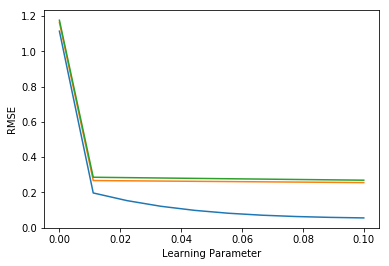

In [165]:
if __name__ == '__main__':
    
    alp = np.linspace(0,0.1,num=10)
    rmse_l = []
    rmse_q = []
    rmse_c = []
    for alpha_ in alp:
        theta1 = np.ones(train1_x.shape[1]) # Initial value of theta for linear
        theta2 = np.ones(train2_x.shape[1]) # Initial value of theta for quadratic
        theta3 = np.ones(train3_x.shape[1]) # Initial value of theta for cubic
        # Linear in Blue
        theta1 = gradient_descent_wo_regularization(train1_x,train_y,theta1,alpha_)
        
        #Quadratic in Orange
        theta2 = gradient_descent_wo_regularization(train2_x,train_y,theta2,alpha_)

        #Cubic in Green
        theta3 = gradient_descent_wo_regularization(train3_x,train_y,theta3,alpha_)
        rmse_l.append(rmse(test1_x,test_y,theta1))
        rmse_q.append(rmse(test2_x,test_y,theta2))
        rmse_c.append(rmse(test3_x,test_y,theta3))
        
        print("Alpha : ",alpha_," Thetas(Linear) : ",theta1)
        print("Alpha : ",alpha_," Thetas(Quadratic) : ",theta2)
        print("Alpha : ",alpha_," Thetas(Cubic) : ",theta3)
        
    print("RMSE Linear: ",rmse(test1_x,test_y,theta1))
    print("RMSE Quadratic: ",rmse(test2_x,test_y,theta2))
    print("RMSE Cubic: ",rmse(test3_x,test_y,theta3)) 

    plt.plot(alp,rmse_l)
    plt.plot(alp,rmse_q)
    plt.plot(alp,rmse_c)
    plt.xlabel("Learning Parameter")
    plt.ylabel("RMSE")